https://medium.com/importexcel/common-excel-task-in-python-vlookup-with-pandas-merge-c99d4e108988
https://stackoverflow.com/questions/19616205/running-an-excel-macro-via-python
https://automatetheboringstuff.com/chapter11/

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/python_logo.png)

# Using Python And Excel For Data Science

You will probably already know that Excel is a spreadsheet application developed by Microsoft. You can use this easily accessible tool to organize, analyze and store your data in tables. What’s more, this software is widely used in many different application fields all over the world.

And, whether you like it or not, this applies to data science.

You’ll need to deal with these spreadsheets at some point, but you won’t always want to continue working in it either. That’s why Python developers have implemented ways to read, write and manipulate not only these files, but also many other types of files.

Today’s tutorial will give you some insights into how you can work with Excel and Python. It will provide you with an overview of packages that you can use to load and write these spreadsheets to files with the help of Python. You’ll learn how to work with packages such as `pandas`, `openpyxl`, `xlrd`, `xlutils` and `pyexcel`.

## The Data As Your Starting Point
When you’re starting a data science project, you will often work from data that you have gathered maybe from web scraping, but probably mostly from datasets that you download from other places, such as Kaggle, Quandl, etc.

But more often than not, you’ll also find data on Google or on repositories that are shared by other users. This data might be in an Excel file or saved to a file with .csv extension, … The possibilities can seem endless sometimes. But whenever you have data, your first step should be to make sure that you’re working with a qualitative data.

In the case of a spreadsheet, you should corroborate that it's qualitative because you might not only want to check if this data can answer the research question that you have in mind but also if you can trust the data that the spreadsheet holds.

## Check The Quality of Your Spreadsheet
To check the overall quality of your spreadsheet, you can go over the following checklist:

- Does the spreadsheet represent static data?
- Does your spreadsheet mix data, calculation, and reporting?
- Is the data in your spreadsheet complete and consistent?
    - Does your spreadsheet have a systematic worksheet structure?
    - Did you check if the live formulas in the spreadsheet are valid?

This list of questions is to make sure that your spreadsheet doesn’t ‘sin’ against the best practices that are generally accepted in the industry. Of course, the above list is not exhaustive: there are many more general rules that you can follow to make sure your spreadsheet is not an ugly duckling. However, the questions that have been formulated above are most relevant for when you want to make sure if the spreadsheet is qualitative.

## Best Practices For Spreadsheet Data
Previous to reading in your spreadsheet in Python, you also want to consider adjusting your file to meet some basic principles, such as:

- The first row of the spreadsheet is usually reserved for the header, while the first column is used to identify the sampling unit;
- Avoid names, values or fields with blank spaces. Otherwise, each word will be interpreted as a separate variable, resulting in errors that are related to the number of elements per line in your data set. Consider using:
 - Underscores,
 - Dashes,
 - Camel case, where the first letter of each section of text is capitalized, or
 - Concatenating words
- Short names are preferred over longer names;
- Try to avoid using names that contain symbols such as ?, `$`,`%`, `^`, `&`, `*`, `(`,`)`,`-`,`#`, `?`,`,`,`<`,`>`, `/`, `|`, `\`, `[` ,`]` ,`{`, and `}`;
- Delete any comments that you have made in your file to avoid extra columns or NA’s to be added to your file; and
Make sure that any missing values in your data set are indicated with NA.

Next, after you have made the necessary changes or when you have taken a thorough look at your data, make sure that you save your changes if you have made any. By doing this, you can revisit the data later to edit it, to add more data or to change them, while you preserve the formulas that you maybe used to calculate the data, etc.

If you’re working with Microsoft Excel, you’ll see that there are a considerable amount of options to save your file: besides the default extension `.xls` or .`xlsx`, you can go to the “File” tab, click on “Save As” and select one of the extensions that are listed as the “Save as Type” options. The most commonly used extensions to save datasets for data science are `.csv` and `.txt` (as tab-delimited text file). Depending on the saving option that you choose, your data set’s fields are separated by tabs or commas, which will make up the “field separator characters” of your data set.

Now that have checked and saves your data, you can start with the preparation of your workspace!

# Load Excel Files As Pandas DataFrames
One of the ways that you’ll often used to import your files when you’re working with them for data science is with the help of the Pandas package. As we saw previously, the Pandas library is built on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language.

This powerful and flexible library is very frequently used by (aspiring) data scientists to get their data into data structures that are highly expressive for their analyses.

If you already have Pandas available through Anaconda, you can just load your files in Pandas DataFrames with pd.Excelfile():

In [125]:
# Import pandas
import pandas as pd

# Load spreadsheet
xl = pd.ExcelFile('https://github.com/fjvarasc/DSPXI/blob/master/data/IMDB-Movie-Data.xlsx?raw=true')
# Print the sheet names
print(xl.sheet_names)


['2010', '2009', '2008', '2007', '2006']


In [126]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2010')

df1.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


## Pandas read_excel
We import the pandas module, including ExcelFile. The method read_excel() reads the data into a Pandas Data Frame, where the first parameter is the filename and the second parameter is the sheet.

The list of columns will be called df.columns.

In [130]:
from pandas import ExcelWriter
from pandas import ExcelFile
 
#df = pd.read_excel('IMDB-Movie-Data.xlsx', sheet_name='2010')
df = pd.read_excel('https://github.com/fjvarasc/DSPXI/blob/master/data/IMDB-Movie-Data.xlsx?raw=true', sheet_name='2010')
print("Column headings:")
print(df.columns)

Column headings:
Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


Using the data frame, we can get all the rows below an entire column as a list. To get such a list, simply use the column header

In [131]:
print(df['Title'])

0                                             Inception
1                                        Shutter Island
2                                  Diary of a Wimpy Kid
3                           Scott Pilgrim vs. the World
4                                              Kick-Ass
5                                             Predators
6     Percy Jackson & the Olympians: The Lightning T...
7                                            Black Swan
8                                She's Out of My League
9                                    The Social Network
10                                           Robin Hood
11                                        Despicable Me
12                                              Tangled
13         Harry Potter and the Deathly Hallows: Part 1
14                                          Srpski film
15                                       Blue Valentine
16                                           Iron Man 2
17                                             T

## How To Write Pandas DataFrames to Excel Files
Let’s say that after your analysis of the data, you want to write the data back to a new file. There’s also a way to write your Pandas DataFrames back to files with the to_excel() function.

But, before you use this function, make sure that you have the XlsxWriter installed if you want to write your data to multiple worksheets in an .xlsx file:
```
# Install `XlsxWriter` 
pip install XlsxWriter
```

In [111]:
# Specify a writer
writer = pd.ExcelWriter('example.xlsx', engine='xlsxwriter')

# Write your DataFrame to a file     
df1.to_excel(writer, 'Sheet1')

# Save the result 
writer.save()

Note that in the code chunk above, you use an ExcelWriter object to output the DataFrame.

Stated differently, you pass the writer variable to the to_excel() function and you also specify the sheet name. This way, you add a sheet with the data to an existing workbook: you can use the ExcelWriter to save multiple, (slightly) different DataFrames to one workbook.

This all means that if you just want to save one DataFrame to a file, you can also go without installing the XlsxWriter package. Then, you just don’t specify the engine argument that you would pass to the pd.ExcelWriter() function. The rest of the steps stay the same.

Similarly to the functions that you used to read in .csv files, you also have a function to_csv() to write the results back to a comma separated file. It again works much in the same way as when you used it to read in the file:


In [112]:
# Write the DataFrame to csv
df1.to_csv("example.csv")

If you want to have a tab separated file, you can also pass a \t to the sep argument to make this clear. Note that there are various other functions that you can use to output your files. You can find all of them [here](http://pandas.pydata.org/pandas-docs/stable/api.html#id12).

# Packages To Parse Excel Files And Write Them Back With Python
Besides the Pandas package, which you will probably use very often to load in your data, you can also use other packages to get your data in Python. Our overview of the available packages is based on [this page](http://www.python-excel.org/), which includes a list of packages that you can use to work with Excel files in Python.

In what follows, you’ll see how to use these packages with the help of some real-life but simplified examples.

## How To Read and Write Excel Files With openpyxl

This package is generally recommended if you want to read and write .xlsx, xlsm, xltx, and xltm files.

In [157]:
# Import `load_workbook` module from `openpyxl`
from openpyxl import load_workbook

# Load in the workbook
wb = load_workbook('./IMDB-Movie-Data.xlsx')
#wb = load_workbook('https://github.com/fjvarasc/DSPXI/blob/master/data/IMDB-Movie-Data.xlsx?raw=true')
# Get sheet names
print(wb.sheetnames)

['2010', '2009', '2008', '2007', '2006']


You see that the code chunk above returns the sheet names of the workbook that you loaded in Python. Next, you can use this information to also retrieve separate sheets of the workbook.

You can also check which sheet is currently active with `wb.active`. As you can see in the code below, you can also use it to load in another sheet from your workbook:

In [114]:
# Get a sheet by name 
sheet = wb['2010']

# Print the sheet title 
sheet.title

# Get currently active sheet
anotherSheet = wb.active

# Check `anotherSheet` 
anotherSheet

<Worksheet "2010">

You’ll see that with these `Worksheet` objects, you won’t be able to do much at first sight. However, you can retrieve values from certain cells in your workbook's sheet by using square brackets `[]`, to which you pass the exact cell from which you want to retrieve the value.

Note that this seems very similar to selecting, getting and indexing NumPy arrays and Pandas DataFrames, yet this is not all that you need to do to get the value; You need to add the attribute `value`:

In [115]:
# Retrieve the value of a certain cell
sheet['A1'].value

# Select element 'B2' of your sheet 
c = sheet['B2']

# Retrieve the row number of your element
c.row

# Retrieve the column letter of your element
c.column

# Retrieve the coordinates of the cell 
c.coordinate

'B2'

As you can see that besides `value`, there are also other attributes that you can use to inspect your cell, namely `row`, `column` and `coordinate`.

- The `row` attribute will give back `2`;
- Adding the `column` attribute to `c` will give you `'B'`, and
- The `coordinate` will give back `'B2'`.

You can also retrieve cell values by using the `cell()` function. Pass the `row` and the `column` arguments and add values to these arguments that correspond to the values of the cell that you want to retrieve and, of course, don’t forget to add the attribute `value`:

In [116]:
# Retrieve cell value 
sheet.cell(row=1, column=2).value

# Print out values in column 2 
for i in range(1, 4):
     print(i, sheet.cell(row=i, column=2).value)

1 Title
2 Inception
3 Shutter Island


Note that if you don’t specify the attribute `value`, you’ll get back `<Cell Sheet3.B1>`, which doesn’t tell you anything about the value that is contained within that particular cell.

You see that you use a for loop with the help of the `range()` function to help you to print out the values of the rows that have values in column 2. If those particular cells are empty, you’ll just get back `None`.

What’s more, there are also special functions that you can call to get certain other values back, like `get_column_letter()` and `column_index_from_string`.

The two functions already state more or less what you can retrieve by using them, but for clarity it’s best to make them explicit: while you can retrieve the letter of the column with the former, you can do the reverse or get the index of a column when you pass a letter to the latter. You can see how it works below:

In [117]:
# Import relevant modules from `openpyxl.utils`
from openpyxl.utils import get_column_letter, column_index_from_string

# Return 'A'
get_column_letter(1)

# Return '1'
column_index_from_string('A')

1

You have already retrieved values for rows that have values in a particular column, but what do you need to do if you want to print out the rows of your file, without just focusing on one single column?

You use another for loop, of course!

You say, for example, that you want to focus on the area that lies in between `'A1'` and `'C3'`, where the first specifies the left upper corner and the second the right bottom corner of the area on which you want to focus.

This area will be the so-called `cellObj` that you see in the first line of code below. You then say that for each cell that lies in that area, you print the coordinate and the value that is contained within that cell. After the end of each row, you’ll print a message that signals that the row of that `cellObj` area has been printed.

In [118]:
# Print row per row
for cellObj in sheet['A1':'C3']:
    for cell in cellObj:
        print(cell.coordinate, cell.value)
    print('--- END ---')

A1 Rank
B1 Title
C1 Genre
--- END ---
A2 81
B2 Inception
C2 Action,Adventure,Sci-Fi
--- END ---
A3 139
B3 Shutter Island
C3 Mystery,Thriller
--- END ---


Note again how the selection of the area is very similar to selecting, getting and indexing list and NumPy array elements, where you also use square brackets and a colon `:` to indicate the area of which you want to get the values. In addition, the above loop also makes good use of the cell attributes!

Lastly, there are some attributes that you can use to check up on the result of your import, namely `max_row` and `max_column`. These attributes are of course general ways of making sure that you loaded in the data correctly, but nonetheless they can and will be useful.

In [119]:
# Retrieve the maximum amount of rows 
sheet.max_row

61

In [120]:
# Retrieve the maximum amount of columns
sheet.max_column

12

This is all very good, but I can almost hear you thinking now that this seems to be an awfully hard way to work with these files, especially if you want to still manipulate the data.
`openpyxl` has support for Pandas DataFrames! You can use the `DataFrame()` function from the Pandas package to put the values of a sheet into a DataFrame:

In [121]:
# Import `pandas` 
import pandas as pd

# Convert Sheet to DataFrame
df = pd.DataFrame(sheet.values)

If you want to specify headers, you need to add a little bit more code:

In [122]:
# Put the sheet values in `data`
data = sheet.values

# Indicate the columns in the sheet values
cols = next(data)[0:]

# Convert your data to a list
data = list(data)

# Make your DataFrame
pd.DataFrame(data, columns=cols)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0
5,228,Predators,"Action,Adventure,Sci-Fi",A group of elite warriors parachute into an un...,Nimr√≥d Antal,"Adrien Brody, Laurence Fishburne, Topher Grace...",2010,107,6.4,179450,52.00,51.0
6,245,Percy Jackson & the Olympians: The Lightning T...,"Adventure,Family,Fantasy",A teenager discovers he's the descendant of a ...,Chris Columbus,"Logan Lerman, Kevin McKidd, Steve Coogan,Brand...",2010,118,5.9,148949,88.76,47.0
7,262,Black Swan,"Drama,Thriller",A committed dancer wins the lead role in a pro...,Darren Aronofsky,"Natalie Portman, Mila Kunis, Vincent Cassel,Wi...",2010,108,8.0,581518,106.95,79.0
8,305,She's Out of My League,"Comedy,Romance","An average Joe meets the perfect woman, but hi...",Jim Field Smith,"Jay Baruchel, Alice Eve, T.J. Miller, Mike Vogel",2010,104,6.4,105619,31.58,46.0
9,325,The Social Network,"Biography,Drama",Harvard student Mark Zuckerberg creates the so...,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",2010,120,7.7,510100,96.92,95.0


Next, you can start manipulating the data with all the functions that the Pandas package has to offer.
To write your Pandas DataFrames back to an Excel file, you can easily use the `dataframe_to_rows()` function from the `utils` module:

In [139]:
# Import `dataframe_to_rows`
from openpyxl.utils.dataframe import dataframe_to_rows

# Initialize a workbook 
wb = load_workbook('./IMDB-Movie-Data.xlsx')

# Get the worksheet in the active workbook
ws = wb.active

# Append the rows of the DataFrame to your worksheet
for r in dataframe_to_rows(df, index=True, header=True):
    ws.append(r)

In [140]:
ws

<Worksheet "2010">

But this is definitely not all! The `openpyxl` package offers you high flexibility on how you write your data back to Excel files, changing cell styles or using the write-only mode, which makes it one of the packages that you definitely need to know when you're often working with spreadsheets.
Tip: read up more on how you can change cell styles, change to the write-only mode or how the package works with NumPy [here](https://openpyxl.readthedocs.io/en/stable/pandas.html).

Now, let's also check out some other packages that you can use to get your spreadsheet data in Python. 

## Reading And Formatting Excel Files: xlrd

This package is ideal if you want to read data and format data from files with the .xls or .xlsx extension.

In [147]:
# Import `xlrd`
import xlrd

# Open a workbook 
workbook = xlrd.open_workbook('IMDB-Movie-Data.xlsx')

# Loads only current sheets to memory
workbook = xlrd.open_workbook('IMDB-Movie-Data.xlsx', on_demand = True)

When you don’t want to consider the whole workbook, you might want to use functions such as `sheet_by_name()` or `sheet_by_index()` to retrieve the sheets that you do want to use in your analysis.

In [148]:
# Load a specific sheet by name
worksheet = workbook.sheet_by_name('2010')

# Load a specific sheet by index 
worksheet = workbook.sheet_by_index(0)

# Retrieve the value from cell at indices (0,0) 
worksheet.cell(1, 2).value

'Action,Adventure,Sci-Fi'

Lastly, you also see that you can retrieve the value at certain coordinates, which you express with indices, from your sheet.
Continue to `xlwt` and `xlutils` to know more about how they relate to the [xlrd](https://xlwt.readthedocs.io/en/latest/) package!

## Using pyexcel To Read .xls or .xlsx Files

Another package that you can use to read spreadsheet data in Python is pyexcel; It’s a Python Wrapper that provides one API for reading, manipulating and writing data in .csv, .ods, .xls, .xlsx and .xlsm files. Of course, for this tutorial, you will just focus on the .xls and .xls files.
To get your data in an array, you can use the get_array() function that is contained within the pyexcel package:


In [151]:
# Import `pyexcel`
import pyexcel

# Get an array from the data
my_array = pyexcel.get_array(file_name="IMDB-Movie-Data.xlsx")

You can also get your data in an ordered dictionary of lists. You can use the get_dict() function:

In [128]:
# Import `OrderedDict` module 
from pyexcel._compact import OrderedDict

# Get your data in an ordered dictionary of lists
my_dict = pyexcel.get_dict(file_name="IMDB-Movie-Data.xlsx", name_columns_by_row=0)

# Get your data in a dictionary of 2D arrays
book_dict = pyexcel.get_book_dict(file_name="IMDB-Movie-Data.xlsx")

However, you also see that if you want to get back a dictionary of two-dimensional arrays or, stated differently, obtain all the workbook sheets in a single dictionary, you can resort to `get_book_dict()`.
Be aware that these two data structures that were mentioned above, the arrays and dictionaries of your spreadsheet, allow you to create DataFrames of your data with `pd.DataFrame()`. This will make it easier to handle your data!
Lastly, you can also just retrieve the records with `pyexcel` thanks to the `get_records()` function. Just pass the argument `file_name` to the function and you should be getting back a list of dictionaries:

In [129]:
# Retrieve the records of the file
records = pyexcel.get_records(file_name="IMDB-Movie-Data.xlsx")
records

[OrderedDict([('Rank', 81),
              ('Title', 'Inception'),
              ('Genre', 'Action,Adventure,Sci-Fi'),
              ('Description',
               'A thief, who steals corporate secrets through use of dream-sharing technology, is given the inverse task of planting an idea into the mind of a CEO.'),
              ('Director', 'Christopher Nolan'),
              ('Actors',
               'Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe'),
              ('Year', 2010),
              ('Runtime (Minutes)', 148),
              ('Rating', 8.8),
              ('Votes', 1583625),
              ('Revenue (Millions)', 292.57),
              ('Metascore', 74)]),
 OrderedDict([('Rank', 139),
              ('Title', 'Shutter Island'),
              ('Genre', 'Mystery,Thriller'),
              ('Description',
               'In 1954, a U.S. marshal investigates the disappearance of a murderess who escaped from a hospital for the criminally insane.'),
              ('

## Writing Files With pyexcel

Just like it’s easy to load your data into arrays with this package, you can also easily export your arrays back to a spreadsheet. Use the `save_as()` function and pass the array and the name of the destination file to the `dest_file_name`` argument:

In [130]:
# Get the data
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Save the array to a file
pyexcel.save_as(array=data, dest_file_name="array_data.xlsx")

Note that if you want to specify a delimiter, you can add the `dest_delimiter` argument and pass the symbol that you want to use as a delimiter in between `""`.
If, however, you have a dictionary, you’ll need to use the `save_book_as()` function. Pass the twodimensional dictionary to `bookdict` and specify the file name and you’re good:

In [131]:
# The data
twod_array_dictionary = {'Sheet 1': [
                                   ['ID', 'AGE', 'SCORE'],
                                   [1, 22, 5],
                                   [2, 15, 6],
                                   [3, 28, 9]
                                  ],
                       'Sheet 2': [
                                    ['X', 'Y', 'Z'],
                                    [1, 2, 3],
                                    [4, 5, 6],
                                    [7, 8, 9]
                                  ],
                       'Sheet 3': [
                                    ['M', 'N', 'O', 'P'],
                                    [10, 11, 12, 13],
                                    [14, 15, 16, 17],
                                    [18, 19, 20, 21]
                                   ]}

# Save the data to a file                        
pyexcel.save_book_as(bookdict=twod_array_dictionary, dest_file_name="2d_array_data.xlsx")

# Reading and Writing .csv files

If you’re still looking for packages that allow you to load in and write data to .csv files besides Pandas, you can best use the csv package:


In [132]:
# Write csv file
import csv
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
outfile = open('data.csv', 'w')
writer = csv.writer(outfile, delimiter=';', quotechar='"')
writer.writerows(data)
outfile.close()

In [133]:
# import `csv`
import csv
# Read in csv file 
for row in csv.reader(open('data.csv'), delimiter=';'):
      print(row)
    

['1', '2', '3']
['4', '5', '6']
['7', '8', '9']


Note also that the NumPy package has a function `genfromtxt()` that allows you to load in the data that is contained within `.csv` files in arrays which you can then put in DataFrames.

# Final Check of Your Data 

When you have the data available, don’t forget the last step: checking whether the data has been loaded in correctly. If you have put your data in a DataFrame, you can easily and quickly check whether the import was successful by running the following commands:

In [134]:
# Check the first entries of the DataFrame
df1.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


In [135]:
# Check the last entries of the DataFrame
df1.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
55,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0
56,953,Sex and the City 2,"Comedy,Drama,Romance","While wrestling with the pressures of life, lo...",Michael Patrick King,"Sarah Jessica Parker, Kim Cattrall, Kristin Da...",2010,146,4.3,62403,95.33,27.0
57,957,Legion,"Action,Fantasy,Horror",When a group of strangers at a dusty roadside ...,Scott Stewart,"Paul Bettany, Dennis Quaid, Charles S. Dutton,...",2010,100,5.2,84158,40.17,32.0
58,964,I Spit on Your Grave,"Crime,Horror,Thriller",A writer who is brutalized during her cabin re...,Steven R. Monroe,"Sarah Butler, Jeff Branson, Andrew Howard,Dani...",2010,108,6.3,60133,0.09,27.0
59,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0


# Excel?, Better pandas
Excel is one of the most popular and widely-used data tools; it’s hard to find an organization that doesn’t work with it in some way. From analysts, to sales VPs, to CEOs, various professionals use Excel for both quick stats and serious data crunching.

With Excel being so pervasive, data professionals must be familiar with it. You’ll also want a tool that can easily read and write Excel files — pandas is perfect for this.

Pandas has excellent methods for reading all kinds of data from Excel files. You can also export your results from pandas back to Excel, if that’s preferred by your intended audience. Pandas is great for other routine data analysis tasks, such as:

- quick Exploratory Data Analysis (EDA)
- drawing attractive plots
- feeding data into machine learning tools like scikit-learn
- building machine learning models on your data
- taking cleaned and processed data to any number of data tools

Pandas is better at automating data processing tasks than Excel, including processing Excel files.

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/img-panda-1.png)

## Read data from the Excel file
We need to first import the data from the Excel file into pandas. To do that, we start by importing the pandas module.

We then use the pandas’ read_excel method to read in data from the Excel file. The easiest way to call this method is to pass the file name. If no sheet name is specified then it will read the first sheet in the index (as shown below).

The file has sheets which have the movies corresponding to a specific year 2010,2009,2008 and so on

In [158]:
import pandas as pd
excel_file = 'https://github.com/fjvarasc/DSPXI/blob/master/data/IMDB-Movie-Data.xlsx?raw=true'
movies = pd.read_excel(excel_file)

Here, the 'read_excel' method read the data from the Excel file into a pandas DataFrame object. Pandas defaults to storing data in DataFrames. We then stored this DataFrame into a variable called 'movies'.

Pandas has a built-in 'DataFrame.head()' method that we can use to easily display the first few rows of our DataFrame. If no argument is passed, it will display first five rows. If a number is passed, it will display the equal number of rows from the top.

In [137]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


Excel files quite often have multiple sheets and the ability to read a specific sheet or all of them is very important. To make this easy, the pandas `read_excel` method takes an argument called `sheetname` that tells pandas which sheet to read in the data from. For this, you can either use the sheet name or the sheet number. Sheet numbers start with zero. If the `sheetname` argument is not given, it defaults to zero and pandas will import the first sheet.

By default, pandas will automatically assign a numeric index or row label starting with zero. You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting 'index_col' property to a column. It takes a numeric value for setting a single column as index or a list of numeric values for creating a multi-index.

In the below code, we are choosing the first column, ‘Title’, as index (index=0) by passing zero to the `index_col` argument.

In [138]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
movies_sheet1.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


As you noticed above, our Excel data file has three sheets. We already read the first sheet in a DataFrame above. Now, using the same syntax, we will read in rest of the two sheets too.

In [139]:
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
movies_sheet2.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,M√©lanie Lau...",2009,153,8.3,959065,120.52,69.0
88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0
148,Watchmen,"Action,Drama,Mystery","In 1985 where former superheroes exist, the mu...",Zack Snyder,"Jackie Earle Haley, Patrick Wilson, Carla Gugi...",2009,162,7.6,410249,107.50,56.0
252,Kynodontas,"Drama,Thriller","Three teenagers live isolated, without leaving...",Yorgos Lanthimos,"Christos Stergioglou, Michele Valley, Angeliki...",2009,94,7.3,50946,0.11,73.0


In [140]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)
movies_sheet3.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
129,Mamma Mia!,"Comedy,Family,Musical",The story of a bride-to-be trying to find her ...,Phyllida Lloyd,"Meryl Streep, Pierce Brosnan, Amanda Seyfried,...",2008,108,6.4,153481,143.70,51.0
166,Twilight,"Drama,Fantasy,Romance",A teenage girl risks everything when she falls...,Catherine Hardwicke,"Kristen Stewart, Robert Pattinson, Billy Burke...",2008,122,5.2,361449,191.45,56.0
178,Tropic Thunder,"Action,Comedy","Through a series of freak occurrences, a group...",Ben Stiller,"Ben Stiller, Jack Black, Robert Downey Jr., Je...",2008,107,7.0,321442,110.42,71.0
204,Iron Man,"Action,Adventure,Sci-Fi","After being held captive in an Afghan cave, bi...",Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...",2008,126,7.9,737719,318.30,79.0


Since all the three sheets have similar data but for different recordsmovies, we will create a single DataFrame from all the three DataFrames we created above. We will use the pandas `concat` method for this and pass in the names of the three DataFrames we just created and assign the results to a new DataFrame object, `movies`. By keeping the DataFrame name same as before, we are over-writing the previously created DataFrame.

In [141]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

We can check if this concatenation by checking the number of rows in the combined DataFrame by calling the method `shape` on it that will give us the number of rows and columns.

In [142]:
movies.shape

(163, 11)

## Using the ExcelFile class to read multiple sheets
We can also use the ExcelFile class to work with multiple sheets from the same Excel file. We first wrap the Excel file using `ExcelFile` and then pass it to `read_excel` method.

In [159]:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
movies = pd.concat(movies_sheets)

If you are reading an Excel file with a lot of sheets and are creating a lot of DataFrames, `ExcelFile` is more convenient and efficient in comparison to `read_excel`. 
With ExcelFile, you only need to pass the Excel file once, and then you can use it to get the DataFrames. When using `read_excel`, you pass the Excel file every time and hence the file is loaded again for every sheet. This can be a huge performance drag if the Excel file has many sheets with a large number of rows.

### Exploring the data
Now that we have read in the movies data set from our Excel file, we can start exploring it using pandas. A pandas DataFrame stores the data in a tabular format, just like the way Excel displays the data in a sheet. Pandas has a lot of built-in methods to explore the DataFrame we created from the Excel file we just read in.

We already introduced the method `head` in the previous section that displays few rows from the top from the DataFrame. Let’s look at few more methods that come in handy while exploring the data set.

We can use the `shape` method to find out the number of rows and columns for the DataFrame.

In [160]:
movies.shape

(260, 12)

This tells us our Excel file has 260 records and 12 columns or observations. This can be useful in reporting the number of records and columns and comparing that with the source data set.

We can use the `tail` method to view the bottom rows. If no parameter is passed, only the bottom five rows are returned.

In [145]:
movies.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
39,919,Perfume: The Story of a Murderer,"Crime,Drama,Fantasy","Jean-Baptiste Grenouille, born with a superior...",Tom Tykwer,"Ben Whishaw, Dustin Hoffman, Alan Rickman,Fran...",2006,147,7.5,199387,2.21,56.0
40,925,Superman Returns,"Action,Adventure,Sci-Fi","Superman reappears after a long absence, but i...",Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...",2006,154,6.1,246797,200.07,72.0
41,936,Talladega Nights: The Ballad of Ricky Bobby,"Action,Comedy,Sport",#1 NASCAR driver Ricky Bobby stays atop the he...,Adam McKay,"Will Ferrell, John C. Reilly, Sacha Baron Cohe...",2006,108,6.6,137502,148.21,66.0
42,960,Lucky Number Slevin,"Crime,Drama,Mystery",A case of mistaken identity lands Slevin into ...,Paul McGuigan,"Josh Hartnett, Ben Kingsley, Morgan Freeman, L...",2006,110,7.8,271940,22.49,53.0
43,966,Inland Empire,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,NaN


In Excel, you’re able to sort a sheet based on the values in one or more columns. In pandas, you can do the same thing with the `sort_values method`. For example, let’s sort our movies DataFrame based on the Revenue column.

In [146]:
sorted_by_gross = movies.sort_values(['Revenue (Millions)'], ascending=False)

Since we have the data sorted by values in a column, we can do few interesting things with it. For example, we can display the top 10 movies by Revenues.

In [147]:
sorted_by_gross['Revenue (Millions)'].head(10)

1     760.51
0     533.32
1     423.03
37    414.98
32    402.08
12    336.53
25    334.19
7     318.76
4     318.30
34    317.01
Name: Revenue (Millions), dtype: float64

We can also create a plot for the top 10 movies by Revenue. As we saw in previous sections Pandas makes it easy to visualize your data with plots and charts through matplotlib, a popular data visualization library. With a couple lines of code, you can start plotting. Moreover, matplotlib plots work well inside Jupyter Notebooks since you can displace the plots right under the code.

First, we import the matplotlib module and set matplotlib to display the plots right in the Jupyter Notebook.

We will draw a bar plot where each bar will represent one of the top 10 movies. We can do this by calling the plot method and setting the argument kind to barh. This tells matplotlib to draw a horizontal bar plot.

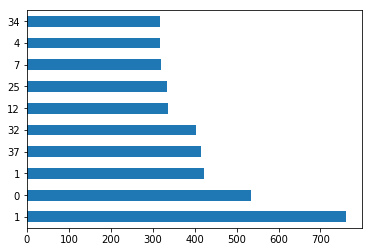

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
sorted_by_gross['Revenue (Millions)'].head(10).plot(kind="barh")
plt.show()

Let’s create a histogram of IMDB Scores to check the distribution of IMDB Scores across all movies. Histograms are a good way to visualize the distribution of a data set. We use the `plot` method on the IMDB Scores series from our movies DataFrame and pass it the argument.

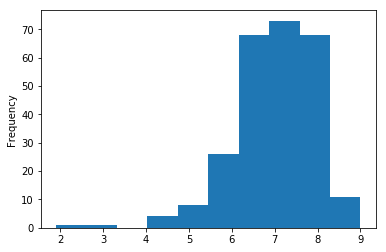

In [149]:
movies['Rating'].plot(kind="hist")
plt.show()

This data visualization suggests that most of the IMDB Scores fall between six and eight.

## Getting statistical information about the data
Pandas has some very handy methods to look at the statistical data about our data set. For example, we can use the `describe` method to get a statistical summary of the data set.

In [150]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02,246.000000,244.000000
mean,592.896154,2008.115385,115.830769,6.957692,2.589859e+05,98.641545,60.344262
std,256.899483,1.412217,19.970302,0.954394,2.210388e+05,103.489295,16.870736
min,40.000000,2006.000000,84.000000,1.900000,2.410000e+02,0.020000,15.000000
25%,416.250000,2007.000000,101.000000,6.500000,1.170815e+05,25.170000,48.750000
50%,611.500000,2008.000000,112.000000,7.100000,1.998800e+05,67.610000,61.500000
75%,815.250000,2009.000000,125.000000,7.700000,3.297092e+05,134.557500,73.000000
max,998.000000,2010.000000,191.000000,9.000000,1.791916e+06,760.510000,98.000000


The `describe` method displays below information for each of the columns.

- the count or number of values
- mean
- standard deviation
- minimum, maximum
- 25%, 50%, and 75% quantile

Please note that this information will be calculated only for the numeric values.

We can also use the corresponding method to access this information one at a time. For example, to get the `mean` of a particular column, you can use the mean method on that column.

In [151]:
movies['Revenue (Millions)'].mean()

98.64154471544715

Just like `mean`, there are methods available for each of the statistical information we want to access. You can the pandas cheat sheet.

## Reading files with no header and skipping records
Earlier in this tutorial, we saw some ways to read a particular kind of Excel file that had headers and no rows that needed skipping. Sometimes, the Excel sheet doesn’t have any header row. For such instances, you can tell pandas not to consider the first row as header or columns names. And If the Excel sheet’s first few rows contain data that should not be read in, you can ask the `read_excel` method to skip a certain number of rows, starting from the top.

This file obviously has no header and first 3 rows are not actual records and hence should not be read in. We can tell `read_excel` there is no `header` by setting argument `header` to `None` and we can skip first four rows by setting argument `skiprows` to 3.

In [152]:
movies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xlsx", header=None, skiprows=3)
movies_skip_rows.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


We skipped four rows from the sheet and used none of the rows as the header. Also, notice that one can combine different options in a single read statement. To skip rows at the bottom of the sheet, you can use option `skip_footer`, which works just like `skiprows`, the only difference being the rows are counted from the bottom upwards.

The column names in the previous DataFrame are numeric and were allotted as default by the pandas. We can rename the column names to descriptive ones by calling the method `columns` on the DataFrame and passing the column names as a list.

In [153]:
movies_skip_rows.columns = ['Rank','Title','Genre','Description','Director','Actors','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']
movies_skip_rows.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.97,63.0
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010,94,6.2,34184,64.00,56.0
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010,117,7.7,456749,48.04,66.0


Now that we have seen how to read a subset of rows from the Excel file, we can learn how to read a subset of columns.

## Reading a subset of columns
Although read_excel defaults to reading and importing all columns, you can choose to import only certain columns. By passing the list, we are telling the `read_excel` method to read only the columns specified as index (the first column being indexed zero).

In [154]:
movies_subset_columns = pd.read_excel(excel_file, usecols=[0,1,2,3,4,5,6])
movies_subset_columns.head()

,Rank,Title,Genre,Description,Director,Actors,Year
0,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010
1,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010
2,142,Diary of a Wimpy Kid,"Comedy,Family",The adventures of a teenager who is fresh out ...,Thor Freudenthal,"Zachary Gordon, Robert Capron, Rachael Harris,...",2010
3,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010
4,220,Kick-Ass,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chlo√´ Gra...",2010


## Applying formulas on the columns
One of the much-used features of Excel is to apply formulas to create new columns from existing column values. In our Excel file, we have Revenue column. We can get Net earnings by subtracting taxes 19%. We could then apply this formula in the Excel file to all the rows. We can do this in pandas also as shown below.

In [155]:
movies = pd.read_excel("IMDB-Movie-Data-full.xlsx", header=0)

movies["Net Earnings"] = movies["Revenue (Millions)"] * 0.81 # 19% taxes

Above, we used pandas to create a new column called Net Earnings, and populated it with the difference of Gross Earnings and Budget. It’s worth noting the difference here in how formulas are treated in Excel versus pandas. In Excel, a formula lives in the cell and updates when the data changes – with Python, the calculations happen and the values are stored – if Gross Earnings for one movie was manually changed, Net Earnings won’t be updated.

Let’s use the `sort_values` method to sort the data by the new column we created and visualize the top 10 movies by Net Earnings.

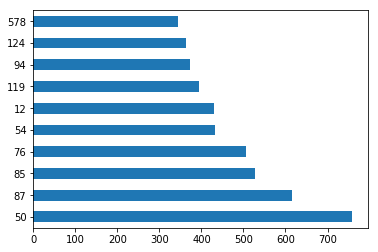

In [156]:
sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=False)
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()

## Pivot Table in pandas
Advanced Excel users also often use pivot tables. A pivot table summarizes the data of another table by grouping the data on an index and applying operations such as sorting, summing, or averaging. You can use this feature in pandas too.

We need to first identify the column or columns that will serve as the index, and the column(s) on which the summarizing formula will be applied. Let’s start small, by choosing Year as the index column and revenue as the summarization column and creating a separate DataFrame from this data.

In [157]:
movies_subset = movies[['Year', 'Revenue (Millions)']]
movies_subset.head()

,Year,Revenue (Millions)
0,2014,333.13
1,2012,126.46
2,2016,138.12
3,2016,270.32
4,2016,325.02


We now call `pivot_table` on this subset of data. The method `pivot_table` takes a parameter `index`. As mentioned, we want to use Year as the index.

In [158]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Revenue (Millions)
Year,
2006,86.296667
2007,87.882245
2008,99.082745
2009,112.601277
2010,105.081579


This gave us a pivot table with grouping on Year and summarization on the sum of Revenues. Notice, we didn’t need to specify Revenue column explicitly as pandas automatically identified it the values on which summarization should be applied.

We can use this pivot table to create some data visualizations. We can call the `plot` method on the DataFrame to create a line plot and call the `show` method to display the plot in the notebook.

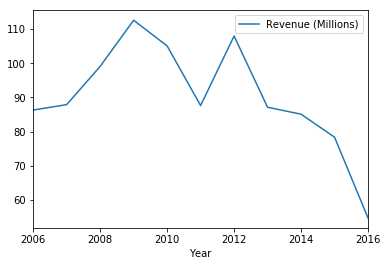

In [159]:
earnings_by_year.plot()
plt.show()

We saw how to pivot with a single column as the index. Things will get more interesting if we can use multiple columns. Let’s create another DataFrame subset but this time we will choose the columns, Country, Language and Gross Earnings.

## Exporting the results to Excel
If you’re going to be working with colleagues who use Excel, saving Excel files out of pandas is important. You can export or write a pandas DataFrame to an Excel file using pandas `to_excel` method. Pandas uses the `xlwt` Python module internally for writing to Excel files. The `to_excel` method is called on the DataFrame we want to export.We also need to pass a filename to which this DataFrame will be written.

In [160]:
movies.to_excel('output.xlsx')

By default, the index is also saved to the output file. However, sometimes the index doesn’t provide any useful information. For example, the movies DataFrame has a numeric auto-increment index, that was not part of the original Excel data.

In [161]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Net Earnings
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,269.8353
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,102.4326
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,111.8772
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,218.9592
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,263.2662


You can choose to skip the index by passing along index-False.

In [162]:
movies.to_excel('output.xlsx', index=False)

We need to be able to make our output files look nice before we can send it out to our co-workers. We can use pandas `ExcelWriter` class along with the `XlsxWriter` Python module to apply the formatting.

We can do use these advanced output options by creating a `ExcelWriter` object and use this object to write to the Excel file. This is very limited in terms of formating.

In [163]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
movies.to_excel(writer, index=False, sheet_name='report')
workbook  = writer.book

Finally, we save the output file by calling the method `save` on the writer object.

In [164]:
writer.save()

As an example, we saved the data with column headers set as bold. And the saved file looks like the image below.

<div class='alert alert-warning' role='light'>
XlsxWriter and Pandas provide very little support for formatting the output data from a dataframe apart from default formatting such as the header and index cells and any cells that contain dates or datetimes. In addition it isn’t possible to format any cells that already have a default format applied.

If you require very controlled formatting of the dataframe output then you would probably be better off using Xlsxwriter directly with raw data taken from Pandas. This as the expenses series directly from a dat
</div>

In [165]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('Expenses02.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Add a number format for cells with money.
money = workbook.add_format({'num_format': '$#,##0'})

# Write some data headers.
worksheet.write('A1', 'Item', bold)
worksheet.write('B1', 'Cost', bold)

# Some data we want to write to the worksheet.
expenses = (
 ['Rent', 1000],
 ['Gas',   100],
 ['Food',  300],
 ['Gym',    50],
)

# Start from the first cell below the headers.
row = 1
col = 0

# Iterate over the data and write it out row by row.
for item, cost in (expenses):
    worksheet.write(row, col,     item)
    worksheet.write(row, col + 1, cost, money)
    row += 1

# Write a total using a formula.
worksheet.write(row, 0, 'Total',       bold)
worksheet.write(row, 1, '=SUM(B2:B5)', money)

workbook.close()

you can check out more at the [official documents](https://xlsxwriter.readthedocs.io/working_with_pandas.html) and also other libraries [here](https://github.com/python-excel)

# Common Excel Tasks Demonstrated in Pandas
The purpose of this is to show some common Excel tasks and how you would execute similar tasks in pandas. Some of the examples are somehow trivial but it is important to show the simple as well as the more complex functions you can find elsewhere. As an added bonus, we are going to do some fuzzy string matching to show a little twist to the process and show how pandas can utilize the full python system of modules to do something simply in python that would be complex in Excel.

## Adding a Sum to a Row
The first task I’ll cover is summing some columns to add a total column.

In [155]:
import pandas as pd
import numpy as np
df = pd.read_excel("https://github.com/fjvarasc/DSPXI/blob/master/data/excel-comp-data.xlsx?raw=true")
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


We want to add a total column to show total sales for Jan, Feb and Mar.

This is straightforward in Excel and in pandas. For Excel, I have added the formula `sum(G2:I2)` in column J. Here is what it looks like in Excel:

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/excel-1.png)

Next, here is how we do it in pandas:

In [113]:
df["total"] = df["Jan"] + df["Feb"] + df["Mar"]
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar,total
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000,107000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000,175000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000,246000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000,175000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000,317000


Next, let’s get some totals and other values for each month. Here is what we are trying to do as shown in Excel:

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/excel-2.png)

As you can see, we added a `SUM(G2:G16)` in row 17 in each of the columns to get totals by month.

Performing column level analysis is easy in pandas. Here are a couple of examples.

In [60]:
df["Jan"].sum(), df["Jan"].mean(),df["Jan"].min(),df["Jan"].max()

(1462000, 97466.66666666667, 10000, 162000)

Now, we want to add a total by month and grand total. This is where pandas and Excel diverge a little. It is very simple to add totals in cells in Excel for each month. Because pandas need to maintain the integrity of the entire DataFrame, there are a couple more steps.

First, create a sum for the month and total columns.

In [61]:
sum_row=df[["Jan","Feb","Mar","total"]].sum()
sum_row

Jan      1462000
Feb      1507000
Mar       717000
total    3686000
dtype: int64

This is fairly intuitive however, if you want to add totals as a row, you need to do some minor manipulations.

We need to transpose the data and convert the Series to a DataFrame so that it is easier to concat onto our existing data. The `T` function allows us to switch the data from being row-based to column-base

In [62]:
df_sum=pd.DataFrame(data=sum_row).T
df_sum

,Jan,Feb,Mar,total
0,1462000,1507000,717000,3686000


The final thing we need to do before adding the totals back is to add the missing columns. We use `reindex` to do this for us. The trick is to add all of our columns and then allow pandas to fill in the values that are missing.

In [63]:
df_sum=df_sum.reindex(columns=df.columns)
df_sum

,account,name,street,city,state,postal-code,Jan,Feb,Mar,total
0,NaN,NaN,NaN,NaN,NaN,NaN,1462000,1507000,717000,3686000


Now that we have a nicely formatted DataFrame, we can add it to our existing one using `append`.

In [64]:
df_final=df.append(df_sum,ignore_index=True)
df_final.tail()

,account,name,street,city,state,postal-code,Jan,Feb,Mar,total
11,231907.0,Hahn-Moore,18115 Olivine Throughway,Norbertomouth,NorthDakota,31415.0,150000,10000,162000,322000
12,242368.0,"Frami, Anderson and Donnelly",182 Bertie Road,East Davian,Iowa,72686.0,162000,120000,35000,317000
13,268755.0,Walsh-Haley,2624 Beatty Parkways,Goodwinmouth,RhodeIsland,31919.0,55000,120000,35000,210000
14,273274.0,McDermott PLC,8917 Bergstrom Meadow,Kathryneborough,Delaware,27933.0,150000,120000,70000,340000
15,NaN,NaN,NaN,NaN,NaN,NaN,1462000,1507000,717000,3686000


## Additional Data Transforms
For another example, let’s try to add a state abbreviation to the data set.

From an Excel perspective the easiest way is probably to add a new column, do a vlookup on the state name and fill in the abbreviation.

I did this and here is a snapshot of what the results looks like:

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/excel-3.png)


You’ll notice that after performing the vlookup, there are some values that are not coming through correctly. That’s because we misspelled some of the states. Handling this in Excel would be really challenging (on big data sets).

Fortunately with pandas we have the full power of the python ecosystem at our disposal. In thinking about how to solve this type of messy data problem, I thought about trying to do some fuzzy text matching to determine the correct value.

Fortunately someone else has done a lot of work in this area. The [fuzzy wuzzy](http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/) library has some pretty useful functions for this type of situation.

Get started by importing the appropriate fuzzywuzzy functions and define our state map dictionary.

In [65]:
"""
state_names returns a state name for a state code, like 'AK': 'Alaska'
country_names returns a country name for a country code, like 'AD': 'Andorra'
state_codes and country_codes are just the reverse
"""

state_names = {
 'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming',
 }

country_names = {
 'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua and Barbuda',
 'AI': 'Anguilla',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AX': '\xc3\x85land Islands',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BL': 'Saint Barth\xc3\xa9lemy',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia, Plurinational State of',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos (Keeling) Islands',
 'CD': 'Congo, The Democratic Republic of the',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland',
 'CI': "C\xc3\xb4te d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CO': 'Colombia',
 'CR': 'Costa Rica',
 'CU': 'Cuba',
 'CV': 'Cape Verde',
 'CX': 'Christmas Island',
 'CY': 'Cyprus',
 'CZ': 'Czech Republic',
 'DE': 'Germany',
 'DJ': 'Djibouti',
 'DK': 'Denmark',
 'DM': 'Dominica',
 'DO': 'Dominican Republic',
 'DZ': 'Algeria',
 'EC': 'Ecuador',
 'EE': 'Estonia',
 'EG': 'Egypt',
 'EH': 'Western Sahara',
 'ER': 'Eritrea',
 'ES': 'Spain',
 'ET': 'Ethiopia',
 'FI': 'Finland',
 'FJ': 'Fiji',
 'FK': 'Falkland Islands (Malvinas)',
 'FM': 'Micronesia, Federated States of',
 'FO': 'Faroe Islands',
 'FR': 'France',
 'GA': 'Gabon',
 'GB': 'United Kingdom',
 'GD': 'Grenada',
 'GE': 'Georgia',
 'GF': 'French Guiana',
 'GG': 'Guernsey',
 'GH': 'Ghana',
 'GI': 'Gibraltar',
 'GL': 'Greenland',
 'GM': 'Gambia',
 'GN': 'Guinea',
 'GP': 'Guadeloupe',
 'GQ': 'Equatorial Guinea',
 'GR': 'Greece',
 'GS': 'South Georgia and the South Sandwich Islands',
 'GT': 'Guatemala',
 'GU': 'Guam',
 'GW': 'Guinea-Bissau',
 'GY': 'Guyana',
 'HK': 'Hong Kong',
 'HM': 'Heard Island and McDonald Islands',
 'HN': 'Honduras',
 'HR': 'Croatia',
 'HT': 'Haiti',
 'HU': 'Hungary',
 'ID': 'Indonesia',
 'IE': 'Ireland',
 'IL': 'Israel',
 'IM': 'Isle of Man',
 'IN': 'India',
 'IO': 'British Indian Ocean Territory',
 'IQ': 'Iraq',
 'IR': 'Iran, Islamic Republic of',
 'IS': 'Iceland',
 'IT': 'Italy',
 'JE': 'Jersey',
 'JM': 'Jamaica',
 'JO': 'Jordan',
 'JP': 'Japan',
 'KE': 'Kenya',
 'KG': 'Kyrgyzstan',
 'KH': 'Cambodia',
 'KI': 'Kiribati',
 'KM': 'Comoros',
 'KN': 'Saint Kitts and Nevis',
 'KP': "Korea, Democratic People's Republic of",
 'KR': 'Korea, Republic of',
 'KW': 'Kuwait',
 'KY': 'Cayman Islands',
 'KZ': 'Kazakhstan',
 'LA': "Lao People's Democratic Republic",
 'LB': 'Lebanon',
 'LC': 'Saint Lucia',
 'LI': 'Liechtenstein',
 'LK': 'Sri Lanka',
 'LR': 'Liberia',
 'LS': 'Lesotho',
 'LT': 'Lithuania',
 'LU': 'Luxembourg',
 'LV': 'Latvia',
 'LY': 'Libyan Arab Jamahiriya',
 'MA': 'Morocco',
 'MC': 'Monaco',
 'MD': 'Moldova, Republic of',
 'ME': 'Montenegro',
 'MF': 'Saint Martin',
 'MG': 'Madagascar',
 'MH': 'Marshall Islands',
 'MK': 'Macedonia, The Former Yugoslav Republic of',
 'ML': 'Mali',
 'MM': 'Myanmar',
 'MN': 'Mongolia',
 'MO': 'Macao',
 'MP': 'Northern Mariana Islands',
 'MQ': 'Martinique',
 'MR': 'Mauritania',
 'MS': 'Montserrat',
 'MT': 'Malta',
 'MU': 'Mauritius',
 'MV': 'Maldives',
 'MW': 'Malawi',
 'MX': 'Mexico',
 'MY': 'Malaysia',
 'MZ': 'Mozambique',
 'NA': 'Namibia',
 'NC': 'New Caledonia',
 'NE': 'Niger',
 'NF': 'Norfolk Island',
 'NG': 'Nigeria',
 'NI': 'Nicaragua',
 'NL': 'Netherlands',
 'NO': 'Norway',
 'NP': 'Nepal',
 'NR': 'Nauru',
 'NU': 'Niue',
 'NZ': 'New Zealand',
 'OM': 'Oman',
 'PA': 'Panama',
 'PE': 'Peru',
 'PF': 'French Polynesia',
 'PG': 'Papua New Guinea',
 'PH': 'Philippines',
 'PK': 'Pakistan',
 'PL': 'Poland',
 'PM': 'Saint Pierre and Miquelon',
 'PN': 'Pitcairn',
 'PR': 'Puerto Rico',
 'PS': 'Palestinian Territory, Occupied',
 'PT': 'Portugal',
 'PW': 'Palau',
 'PY': 'Paraguay',
 'QA': 'Qatar',
 'RE': 'R\xc3\xa9union',
 'RO': 'Romania',
 'RS': 'Serbia',
 'RU': 'Russian Federation',
 'RW': 'Rwanda',
 'SA': 'Saudi Arabia',
 'SB': 'Solomon Islands',
 'SC': 'Seychelles',
 'SD': 'Sudan',
 'SE': 'Sweden',
 'SG': 'Singapore',
 'SH': 'Saint Helena',
 'SI': 'Slovenia',
 'SJ': 'Svalbard and Jan Mayen',
 'SK': 'Slovakia',
 'SL': 'Sierra Leone',
 'SM': 'San Marino',
 'SN': 'Senegal',
 'SO': 'Somalia',
 'SR': 'Suriname',
 'ST': 'Sao Tome and Principe',
 'SV': 'El Salvador',
 'SY': 'Syrian Arab Republic',
 'SZ': 'Swaziland',
 'TC': 'Turks and Caicos Islands',
 'TD': 'Chad',
 'TF': 'French Southern Territories',
 'TG': 'Togo',
 'TH': 'Thailand',
 'TJ': 'Tajikistan',
 'TK': 'Tokelau',
 'TL': 'Timor-Leste',
 'TM': 'Turkmenistan',
 'TN': 'Tunisia',
 'TO': 'Tonga',
 'TR': 'Turkey',
 'TT': 'Trinidad and Tobago',
 'TV': 'Tuvalu',
 'TW': 'Taiwan, Province of China',
 'TZ': 'Tanzania, United Republic of',
 'UA': 'Ukraine',
 'UG': 'Uganda',
 'UM': 'United States Minor Outlying Islands',
 'US': 'United States',
 'UY': 'Uruguay',
 'UZ': 'Uzbekistan',
 'VA': 'Holy See (Vatican City State)',
 'VC': 'Saint Vincent and the Grenadines',
 'VE': 'Venezuela, Bolivarian Republic of',
 'VG': 'Virgin Islands, British',
 'VI': 'Virgin Islands, U.S.',
 'VN': 'Viet Nam',
 'VU': 'Vanuatu',
 'WF': 'Wallis and Futuna',
 'WS': 'Samoa',
 'YE': 'Yemen',
 'YT': 'Mayotte',
 'ZA': 'South Africa',
 'ZM': 'Zambia',
 'ZW': 'Zimbabwe',
 }

# Reverse mappings, too, for convenience
state_codes = dict((v, k) for k, v in state_names.items())
country_codes = dict((v, k) for k, v in country_names.items())

In [66]:
#example using state code
state_names['NY']

'New York'

In [101]:
#using state name
state_codes['New York']

'NY'

In [68]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

Here are some example of how the fuzzy text matching function works.

In [69]:
process.extractOne("Minnesotta",choices=state_codes.keys())

('Minnesota', 95)

In [70]:
process.extractOne("AlaBAMMazzz",choices=state_codes.keys(),score_cutoff=80)

Add the column in the location we want and fill it with NaN values

In [114]:
df.insert(6, "abbrev", np.nan)
df.head()

,account,name,street,city,state,postal-code,abbrev,Jan,Feb,Mar,total
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,NaN,10000,62000,35000,107000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,NaN,95000,45000,35000,175000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,NaN,91000,120000,35000,246000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,NaN,45000,120000,10000,175000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,NaN,162000,120000,35000,317000


We use `apply` to add the abbreviations into the approriate column.

In [ ]:
def convert_state(row):
    abbrev = process.extractOne(row["state"],choices=state_codes.keys(),score_cutoff=80)
    if abbrev:
        #print (abbrev)
        return state_codes[abbrev[0]]
    return np.nan

In [115]:
df['abbrev'] = df.apply(convert_state, axis=1)
df.tail()

,account,name,street,city,state,postal-code,abbrev,Jan,Feb,Mar,total
10,214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,TN,45000,120000,55000,220000
11,231907,Hahn-Moore,18115 Olivine Throughway,Norbertomouth,NorthDakota,31415,ND,150000,10000,162000,322000
12,242368,"Frami, Anderson and Donnelly",182 Bertie Road,East Davian,Iowa,72686,IA,162000,120000,35000,317000
13,268755,Walsh-Haley,2624 Beatty Parkways,Goodwinmouth,RhodeIsland,31919,RI,55000,120000,35000,210000
14,273274,McDermott PLC,8917 Bergstrom Meadow,Kathryneborough,Delaware,27933,DE,150000,120000,70000,340000


We have developed a very simple process to intelligently clean up this data. Obviously when you only have 15 or so rows, this is not a big deal. However, what if you had 15,000? You would have to do something manual in Excel to clean this up.

## Subtotals
For the final section of this article, let’s get some subtotals by state.

In Excel, we would use the `subtotal` tool to do this for us.

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/excel-4.png)


The output would look like this:

![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/excel-5.png)

Creating a subtotal in pandas, is accomplished using `groupby`

In [116]:
df_sub=df[["abbrev","Jan","Feb","Mar","total"]].groupby('abbrev').sum()
df_sub

,Jan,Feb,Mar,total
abbrev,,,,
AR,150000,120000,35000,305000
CA,162000,120000,35000,317000
DE,150000,120000,70000,340000
IA,253000,240000,70000,563000
ID,70000,120000,35000,225000
ME,45000,120000,10000,175000
MS,62000,120000,70000,252000
NC,95000,45000,35000,175000
ND,150000,10000,162000,322000


Next, we want to format the data as currency by using `applymap` to all the values in the data frame.

In [117]:
def money(x):
    return "${:,.0f}".format(x)

formatted_df = df_sub.applymap(money)
formatted_df

,Jan,Feb,Mar,total
abbrev,,,,
AR,"$150,000","$120,000","$35,000","$305,000"
CA,"$162,000","$120,000","$35,000","$317,000"
DE,"$150,000","$120,000","$70,000","$340,000"
IA,"$253,000","$240,000","$70,000","$563,000"
ID,"$70,000","$120,000","$35,000","$225,000"
ME,"$45,000","$120,000","$10,000","$175,000"
MS,"$62,000","$120,000","$70,000","$252,000"
NC,"$95,000","$45,000","$35,000","$175,000"
ND,"$150,000","$10,000","$162,000","$322,000"


The formatting looks good, now we can get the totals like we did earlier.

In [118]:
sum_row=df_sub[["Jan","Feb","Mar","total"]].sum()
sum_row

Jan      1462000
Feb      1507000
Mar       717000
total    3686000
dtype: int64

Convert the values to columns and format it.

In [119]:
df_sub_sum=pd.DataFrame(data=sum_row).T
df_sub_sum=df_sub_sum.applymap(money)
df_sub_sum

,Jan,Feb,Mar,total
0,"$1,462,000","$1,507,000","$717,000","$3,686,000"


Finally, add the total value to the DataFrame

In [120]:
final_table = formatted_df.append(df_sub_sum)
final_table

,Jan,Feb,Mar,total
AR,"$150,000","$120,000","$35,000","$305,000"
CA,"$162,000","$120,000","$35,000","$317,000"
DE,"$150,000","$120,000","$70,000","$340,000"
IA,"$253,000","$240,000","$70,000","$563,000"
ID,"$70,000","$120,000","$35,000","$225,000"
ME,"$45,000","$120,000","$10,000","$175,000"
MS,"$62,000","$120,000","$70,000","$252,000"
NC,"$95,000","$45,000","$35,000","$175,000"
ND,"$150,000","$10,000","$162,000","$322,000"
PA,"$70,000","$95,000","$35,000","$200,000"


You’ll notice that the index is ‘0’ for the total line. We want to change that using `rename` .

In [121]:
final_table = final_table.rename(index={0:"Total"})
final_table

,Jan,Feb,Mar,total
AR,"$150,000","$120,000","$35,000","$305,000"
CA,"$162,000","$120,000","$35,000","$317,000"
DE,"$150,000","$120,000","$70,000","$340,000"
IA,"$253,000","$240,000","$70,000","$563,000"
ID,"$70,000","$120,000","$35,000","$225,000"
ME,"$45,000","$120,000","$10,000","$175,000"
MS,"$62,000","$120,000","$70,000","$252,000"
NC,"$95,000","$45,000","$35,000","$175,000"
ND,"$150,000","$10,000","$162,000","$322,000"
PA,"$70,000","$95,000","$35,000","$200,000"


# Filtering the data

Import the pandas and numpy modules.

In [161]:
import pandas as pd
import numpy as np

Load in the Excel data that represents a year's worth of sales.

In [162]:
df = pd.read_excel("https://github.com/fjvarasc/DSPXI/blob/master/data/sample-salesv3.xlsx?raw=true")

Take a quick look at the data types to make sure everything came through as expected.

In [163]:
df.dtypes

account number      int64
name               object
sku                object
quantity            int64
unit price        float64
ext price         float64
date               object
dtype: object

You'll notice that our date column is showing up as a generic `object`. We are going to convert it to datetime object to make some selections a little easier.

In [164]:
df['date'] = pd.to_datetime(df['date'])

In [165]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [6]:
df.dtypes

account number             int64
name                      object
sku                       object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

The date is now a datetime object which will be useful in future steps.

Similar to the autofilter function in Excel, you can use pandas to filter and select certain subsets of data.

For instance, if we want to just see a specific account number, we can easily do that with pandas.

Note, I am going to use the `head` function to show the top results. This is purely for the purposes of keeping the article shorter.

In [166]:
df[df["account number"]==307599].head()

,account number,name,sku,quantity,unit price,ext price,date
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
13,307599,"Kassulke, Ondricka and Metz",S2-10342,17,12.44,211.48,2014-01-04 07:53:01
34,307599,"Kassulke, Ondricka and Metz",S2-78676,35,33.04,1156.40,2014-01-10 05:26:31
58,307599,"Kassulke, Ondricka and Metz",B1-20000,22,37.87,833.14,2014-01-15 16:22:22
70,307599,"Kassulke, Ondricka and Metz",S2-10342,44,96.79,4258.76,2014-01-18 06:32:31


You could also do the filtering based on numeric values.

In [167]:
df[df["quantity"] > 22].head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
14,737550,"Fritsch, Russel and Anderson",B1-53102,23,71.56,1645.88,2014-01-04 08:57:48
15,239344,Stokes LLC,S1-06532,34,71.51,2431.34,2014-01-04 11:34:58


If we want to do more complex filtering, we can use `map` to filter. In this example, let's look for items with sku's that start with B1.

In [168]:
df[df["sku"].map(lambda x: x.startswith('B1'))].head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
6,218895,Kulas Inc,B1-65551,2,31.10,62.20,2014-01-02 10:57:23
14,737550,"Fritsch, Russel and Anderson",B1-53102,23,71.56,1645.88,2014-01-04 08:57:48
17,239344,Stokes LLC,B1-50809,14,16.23,227.22,2014-01-04 22:14:32


It's easy to chain two statements together using the &.

In [169]:
df[df["sku"].map(lambda x: x.startswith('B1')) & (df["quantity"] > 22)].head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
14,737550,"Fritsch, Russel and Anderson",B1-53102,23,71.56,1645.88,2014-01-04 08:57:48
26,737550,"Fritsch, Russel and Anderson",B1-53636,42,42.06,1766.52,2014-01-08 00:02:11
31,714466,Trantow-Barrows,B1-33087,32,19.56,625.92,2014-01-09 10:16:32


Another useful function that pandas supports is called `isin`. It allows us to define a list of values we want to look for.

In this case, we look for all records that include two specific account numbers.

In [170]:
df[df["account number"].isin([714466,218895])].head()

,account number,name,sku,quantity,unit price,ext price,date
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
5,714466,Trantow-Barrows,S2-77896,17,87.63,1489.71,2014-01-02 10:07:15
6,218895,Kulas Inc,B1-65551,2,31.10,62.20,2014-01-02 10:57:23
8,714466,Trantow-Barrows,S1-50961,22,84.09,1849.98,2014-01-03 11:29:02


Pandas supports another function called `query` which allows you to efficiently select subsets of data. It does require the installation of [numexpr](https://github.com/pydata/numexpr) so make sure you have it installed before trying this step.

If you would like to get a list of customers by name, you can do that with a query, similar to the python syntax shown above.

In [171]:
df.query('name == ["Kulas Inc","Barton LLC"]').head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
6,218895,Kulas Inc,B1-65551,2,31.10,62.20,2014-01-02 10:57:23
33,218895,Kulas Inc,S1-06532,3,22.36,67.08,2014-01-09 23:58:27
36,218895,Kulas Inc,S2-34077,16,73.04,1168.64,2014-01-10 12:07:30


The query function allows you do more than just this simple example but for the purposes of this discussion, I'm showing it so you are aware that it is out there for you.

# Working with Dates

Using pandas, you can do complex filtering on dates. Before doing anything with dates, I encourage you to sort by the date column to make sure the results return what you are expecting.

In [172]:
df = df.sort('date')
df.head()

AttributeError: 'DataFrame' object has no attribute 'sort'

The python filtering syntax shown before works with dates.

In [173]:
df[df['date'] >='20140905'].head()

,account number,name,sku,quantity,unit price,ext price,date
1042,163416,Purdy-Kunde,B1-38851,41,98.69,4046.29,2014-09-05 01:52:32
1043,714466,Trantow-Barrows,S1-30248,1,37.16,37.16,2014-09-05 06:17:19
1044,729833,Koepp Ltd,S1-65481,48,16.04,769.92,2014-09-05 08:54:41
1045,729833,Koepp Ltd,S2-11481,6,26.50,159.00,2014-09-05 16:33:15
1046,737550,"Fritsch, Russel and Anderson",B1-33364,4,76.44,305.76,2014-09-06 08:59:08


One of the really nice features of pandas is that it understands dates so will allow us to do partial filtering. If we want to only look for data more recent than a specific month, we can do so.

In [174]:
df[df['date'] >='2014-03'].head()

,account number,name,sku,quantity,unit price,ext price,date
242,163416,Purdy-Kunde,S1-30248,19,65.03,1235.57,2014-03-01 16:07:40
243,527099,Sanford and Sons,S2-82423,3,76.21,228.63,2014-03-01 17:18:01
244,527099,Sanford and Sons,B1-50809,8,70.78,566.24,2014-03-01 18:53:09
245,737550,"Fritsch, Russel and Anderson",B1-50809,20,50.11,1002.20,2014-03-01 23:47:17
246,688981,Keeling LLC,B1-86481,-1,97.16,-97.16,2014-03-02 01:46:44


Of course, you can chain the criteria.

In [175]:
df[(df['date'] >='20140701') & (df['date'] <= '20140715')].head()

,account number,name,sku,quantity,unit price,ext price,date
778,737550,"Fritsch, Russel and Anderson",S1-65481,35,70.51,2467.85,2014-07-01 00:21:58
779,218895,Kulas Inc,S1-30248,9,16.56,149.04,2014-07-01 00:52:38
780,163416,Purdy-Kunde,S2-82423,44,68.27,3003.88,2014-07-01 08:15:52
781,672390,Kuhn-Gusikowski,B1-04202,48,99.39,4770.72,2014-07-01 11:12:13
782,642753,Pollich LLC,S2-23246,1,51.29,51.29,2014-07-02 04:02:39


Because pandas understands date columns, you can express the date value in multiple formats and it will give you the results you expect.

In [176]:
df[df['date'] >= 'Oct-2014'].head()

,account number,name,sku,quantity,unit price,ext price,date
1141,307599,"Kassulke, Ondricka and Metz",B1-50809,25,56.63,1415.75,2014-10-01 10:56:32
1142,737550,"Fritsch, Russel and Anderson",S2-82423,38,45.17,1716.46,2014-10-01 16:17:24
1143,737550,"Fritsch, Russel and Anderson",S1-47412,6,68.68,412.08,2014-10-01 22:28:49
1144,146832,Kiehn-Spinka,S2-11481,13,18.80,244.40,2014-10-02 00:31:01
1145,424914,White-Trantow,B1-53102,9,94.47,850.23,2014-10-02 02:48:26


In [177]:
df[df['date'] >= '10-10-2014'].head()

,account number,name,sku,quantity,unit price,ext price,date
1174,257198,"Cronin, Oberbrunner and Spencer",S2-34077,13,12.24,159.12,2014-10-10 02:59:06
1175,740150,Barton LLC,S1-65481,28,53.00,1484.00,2014-10-10 15:08:53
1176,146832,Kiehn-Spinka,S1-27722,15,64.39,965.85,2014-10-10 18:24:01
1177,257198,"Cronin, Oberbrunner and Spencer",S2-16558,3,35.34,106.02,2014-10-11 01:48:13
1178,737550,"Fritsch, Russel and Anderson",B1-53636,10,56.95,569.50,2014-10-11 10:25:53


When working with time series data, if we convert the data to use the date as at the index, we can do some more filtering.

Set the new index using `set_index`.

In [178]:
df2 = df.set_index(['date'])
df2.head()

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-01-01 07:21:51,740150,Barton LLC,B1-20000,39,86.69,3380.91
2014-01-01 10:00:47,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16
2014-01-01 13:24:58,218895,Kulas Inc,B1-69924,23,90.70,2086.10
2014-01-01 15:05:22,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05
2014-01-01 23:26:55,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26


We can slice the data to get a range.

In [179]:
df2["20140101":"20140201"].head()

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-01-01 07:21:51,740150,Barton LLC,B1-20000,39,86.69,3380.91
2014-01-01 10:00:47,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16
2014-01-01 13:24:58,218895,Kulas Inc,B1-69924,23,90.70,2086.10
2014-01-01 15:05:22,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05
2014-01-01 23:26:55,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26


Once again, we can use various date representations to remove any ambiguity around date naming conventions.

In [180]:
df2["2014-Jan-1":"2014-Feb-1"].head()

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-01-01 07:21:51,740150,Barton LLC,B1-20000,39,86.69,3380.91
2014-01-01 10:00:47,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16
2014-01-01 13:24:58,218895,Kulas Inc,B1-69924,23,90.70,2086.10
2014-01-01 15:05:22,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05
2014-01-01 23:26:55,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26


In [181]:
df2["2014-Jan-1":"2014-Feb-1"].tail()

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-01-31 22:51:18,383080,Will LLC,B1-05914,43,80.17,3447.31
2014-02-01 09:04:59,383080,Will LLC,B1-20000,7,33.69,235.83
2014-02-01 11:51:46,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32
2014-02-01 17:24:32,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97
2014-02-01 19:56:48,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70


In [182]:
df2["2014"].head()

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-01-01 07:21:51,740150,Barton LLC,B1-20000,39,86.69,3380.91
2014-01-01 10:00:47,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16
2014-01-01 13:24:58,218895,Kulas Inc,B1-69924,23,90.70,2086.10
2014-01-01 15:05:22,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05
2014-01-01 23:26:55,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26


In [183]:
df2["2014-Dec"].head()

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-12-01 20:15:34,714466,Trantow-Barrows,S1-82801,3,77.97,233.91
2014-12-02 20:00:04,146832,Kiehn-Spinka,S2-23246,37,57.81,2138.97
2014-12-03 04:43:53,218895,Kulas Inc,S2-77896,30,77.44,2323.20
2014-12-03 06:05:43,141962,Herman LLC,B1-53102,20,26.12,522.40
2014-12-03 14:17:34,642753,Pollich LLC,B1-53636,19,71.21,1352.99


# Additional String Functions

Pandas has support for vectorized string functions as well. If we want to identify all the skus that contain a certain value, we can use `str.contains`. In this case, we know that the sku is always represented in the same way, so B1 only shows up in the front of the sku.

In [184]:
df[df['sku'].str.contains('B1')].head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
6,218895,Kulas Inc,B1-65551,2,31.10,62.20,2014-01-02 10:57:23
14,737550,"Fritsch, Russel and Anderson",B1-53102,23,71.56,1645.88,2014-01-04 08:57:48
17,239344,Stokes LLC,B1-50809,14,16.23,227.22,2014-01-04 22:14:32


We can string queries together and use sort to control how the data is ordered.

A common need I have in Excel is to understand all the unique items in a column. For instance, maybe I only want to know when customers purchased in this time period. The unique function makes this trivial.

In [ ]:
df[(df['sku'].str.contains('B1-531')) & (df['quantity']>40)]#.sort(columns=['quantity','name'],ascending=[0,1])

# Bonus Task

I frequently find myself trying to get a list of unique items in a long list within Excel. It is a multi-step process to do this in Excel but is fairly simple in pandas. We just use the `unique` function on a column to get the list.

In [186]:
df["name"].unique()

array(['Barton LLC', 'Trantow-Barrows', 'Kulas Inc',
       'Kassulke, Ondricka and Metz', 'Jerde-Hilpert', 'Koepp Ltd',
       'Fritsch, Russel and Anderson', 'Kiehn-Spinka', 'Keeling LLC',
       'Frami, Hills and Schmidt', 'Stokes LLC', 'Kuhn-Gusikowski',
       'Herman LLC', 'White-Trantow', 'Sanford and Sons', 'Pollich LLC',
       'Will LLC', 'Cronin, Oberbrunner and Spencer',
       'Halvorson, Crona and Champlin', 'Purdy-Kunde'], dtype=object)

If we wanted to include the account number, we could use `drop_duplicates`.

In [187]:
df.drop_duplicates(subset=["account number","name"]).head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


We are obviously pulling in more data than we need and getting some non-useful information, so select only the first and second columns using `ix`.

In [188]:
df.drop_duplicates(subset=["account number","name"]).ix[:,[0,1]]

/home/fjvarasc/DSPXI/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,account number,name
0,740150,Barton LLC
1,714466,Trantow-Barrows
2,218895,Kulas Inc
3,307599,"Kassulke, Ondricka and Metz"
4,412290,Jerde-Hilpert
7,729833,Koepp Ltd
9,737550,"Fritsch, Russel and Anderson"
10,146832,Kiehn-Spinka
11,688981,Keeling LLC
12,786968,"Frami, Hills and Schmidt"


I hope you found this useful. I encourage you to try and apply these ideas to some of your own repetitive Excel tasks and streamline your work flow.

# Guided Lab : Collecting the Data

Import pandas and numpy

In [1]:
import pandas as pd
import numpy as np

Let's take a look at the files in our input directory, using the convenient shell commands in ipython.

In [2]:
!ls ../data

All-Web-Site-Data-Audience-Overview.xlsx  sales-jan-2014.xlsx
customer-status.xlsx			  sales-mar-2014.xlsx
March-2017-forecast-article.xlsx	  sales_transactions.xlsx
mn-budget-detail-2014.csv		  sample-sales-reps.xlsx
sales-estimate.xlsx			  sample-sales-tax.csv
sales-feb-2014.xlsx			  sample-salesv3.xlsx
salesfunnel.xlsx


There are a lot of files, but we only want to look at the sales .xlsx files. 

In [3]:
!ls ../data/sales-*-2014.xlsx

../data/sales-feb-2014.xlsx  ../data/sales-mar-2014.xlsx
../data/sales-jan-2014.xlsx


Use the python glob module to easily list out the files we need

In [4]:
import glob

In [5]:
glob.glob("../data/sales-*-2014.xlsx")

['../data/sales-feb-2014.xlsx',
 '../data/sales-jan-2014.xlsx',
 '../data/sales-mar-2014.xlsx']

This gives us what we need, let's import each of our files and combine them into one file. 

Panda's concat and append can do this for us. I'm going to use append in this example.

The code snippet below will initialize a blank DataFrame then append all of the individual files into the all_data DataFrame.

In [6]:
all_data = pd.DataFrame()
for f in glob.glob("../data/sales-*-2014.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

Now we have all the data in our all_data DataFrame. You can use describe to look at it and make sure you data looks good.

In [7]:
all_data.describe()

,account number,quantity,unit price,ext price
count,384.000000,384.000000,384.000000,384.000000
mean,478125.989583,24.372396,56.651406,1394.517344
std,220902.947401,14.373219,27.075883,1117.809743
min,141962.000000,-1.000000,10.210000,-97.160000
25%,257198.000000,12.000000,32.612500,482.745000
50%,424914.000000,23.500000,58.160000,1098.710000
75%,714466.000000,37.000000,80.965000,2132.260000
max,786968.000000,49.000000,99.730000,4590.810000


Alot of this data may not make much sense for this data set but I'm most interested in the count row to make sure the number of data elements makes sense.

In [8]:
all_data.head()

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20


It is not critical in this example but the best practice is to convert the date column to a date time object.

In [9]:
all_data['date'] = pd.to_datetime(all_data['date'])

## Combining Data

Now that we have all of the data into one DataFrame, we can do any manipulations the DataFrame supports. In this case, the next thing we want to do is read in another file that contains the customer status by account. You can think of this as a company's customer segmentation strategy or some other mechanism for identifying their customers.

First, we read in the data.

In [10]:
status = pd.read_excel("../data/customer-status.xlsx")
status

,account number,name,status
0,740150,Barton LLC,gold
1,714466,Trantow-Barrows,silver
2,218895,Kulas Inc,bronze
3,307599,"Kassulke, Ondricka and Metz",bronze
4,412290,Jerde-Hilpert,bronze
5,729833,Koepp Ltd,silver
6,146832,Kiehn-Spinka,silver
7,688981,Keeling LLC,silver
8,786968,"Frami, Hills and Schmidt",silver
9,239344,Stokes LLC,gold


We want to merge this data with our concatenated data set of sales. We use panda's merge function and tell it to do a left join which is similar to Excel's vlookup function.

In [11]:
all_data_st = pd.merge(all_data, status, how='left')
all_data_st.head()

,account number,name,sku,quantity,unit price,ext price,date,status
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59,NaN
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46,bronze
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32,bronze
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48,bronze
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20,silver


This looks pretty good but let's look at a specific account.

In [12]:
all_data_st[all_data_st["account number"]==737550].head()

,account number,name,sku,quantity,unit price,ext price,date,status
15,737550,"Fritsch, Russel and Anderson",S1-47412,40,51.01,2040.40,2014-02-05 01:20:40,NaN
25,737550,"Fritsch, Russel and Anderson",S1-06532,34,18.69,635.46,2014-02-07 09:22:02,NaN
66,737550,"Fritsch, Russel and Anderson",S1-27722,15,70.23,1053.45,2014-02-16 18:24:42,NaN
78,737550,"Fritsch, Russel and Anderson",S2-34077,26,93.35,2427.10,2014-02-20 18:45:43,NaN
80,737550,"Fritsch, Russel and Anderson",S1-93683,31,10.52,326.12,2014-02-21 13:55:45,NaN


This account number was not in our status file, so we have a bunch of NaN's. We can decide how we want to handle this situation. For this specific case, let's label all missing accounts as bronze. Use the fillna function to easily accomplish this on the status column.

In [13]:
all_data_st['status'].fillna('bronze',inplace=True)
all_data_st.head()

,account number,name,sku,quantity,unit price,ext price,date,status
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59,bronze
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46,bronze
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32,bronze
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48,bronze
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20,silver


Check the data just to make sure we're all good.

In [14]:
all_data_st[all_data_st["account number"]==737550].head()

,account number,name,sku,quantity,unit price,ext price,date,status
15,737550,"Fritsch, Russel and Anderson",S1-47412,40,51.01,2040.40,2014-02-05 01:20:40,bronze
25,737550,"Fritsch, Russel and Anderson",S1-06532,34,18.69,635.46,2014-02-07 09:22:02,bronze
66,737550,"Fritsch, Russel and Anderson",S1-27722,15,70.23,1053.45,2014-02-16 18:24:42,bronze
78,737550,"Fritsch, Russel and Anderson",S2-34077,26,93.35,2427.10,2014-02-20 18:45:43,bronze
80,737550,"Fritsch, Russel and Anderson",S1-93683,31,10.52,326.12,2014-02-21 13:55:45,bronze


Now we have all of the data along with the status column filled in. We can do our normal data manipulations using the full suite of pandas capability.

## Using Categories

One of the relatively new functions in pandas is support for categorical data. From the pandas, documentation -

"Categoricals are a pandas data type, which correspond to categorical variables in statistics: a variable, which can take on only a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood types, country affiliations, observation time or ratings via Likert scales."

For our purposes, the status field is a good candidate for a category type.

You must make sure you have a recent version of pandas installed for this example to work.

In [15]:
pd.__version__

'0.20.2'

First, we typecast it to a category using astype.

In [16]:
all_data_st["status"] = all_data_st["status"].astype("category")

This doesn't immediately appear to change anything yet.

In [17]:
all_data_st.head()

,account number,name,sku,quantity,unit price,ext price,date,status
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59,bronze
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46,bronze
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32,bronze
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48,bronze
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20,silver


Buy you can see that it is a new data type.

In [18]:
all_data_st.dtypes

account number             int64
name                      object
sku                       object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
status                  category
dtype: object

Categories get more interesting when you assign order to the categories. Right now, if we call sort on the column, it will sort alphabetically. 

In [19]:
all_data_st.sort_values(by=["status"]).head()

,account number,name,sku,quantity,unit price,ext price,date,status
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59,bronze
196,218895,Kulas Inc,S2-83881,41,78.27,3209.07,2014-01-20 09:37:58,bronze
197,383080,Will LLC,B1-33364,26,90.19,2344.94,2014-01-20 09:39:59,bronze
198,604255,"Halvorson, Crona and Champlin",S2-11481,37,96.71,3578.27,2014-01-20 13:07:28,bronze
200,527099,Sanford and Sons,B1-05914,18,64.32,1157.76,2014-01-20 21:40:58,bronze


We use set_categories to tell it the order we want to use for this category object. In this case, we use the Olympic medal ordering.

In [20]:
 all_data_st["status"].cat.set_categories([ "gold","silver","bronze"],inplace=True)

Now, we can sort it so that gold shows on top.

In [21]:
all_data_st.sort_values(by=["status"]).head()

,account number,name,sku,quantity,unit price,ext price,date,status
68,740150,Barton LLC,B1-38851,17,81.22,1380.74,2014-02-17 17:12:16,gold
63,257198,"Cronin, Oberbrunner and Spencer",S1-27722,28,10.21,285.88,2014-02-15 17:27:44,gold
207,740150,Barton LLC,B1-86481,20,30.41,608.20,2014-01-22 16:33:51,gold
61,740150,Barton LLC,B1-20000,28,81.39,2278.92,2014-02-15 07:45:16,gold
60,239344,Stokes LLC,S2-83881,30,43.00,1290.00,2014-02-15 02:13:23,gold


In [22]:
all_data_st["status"].describe()

count        384
unique         3
top       bronze
freq         172
Name: status, dtype: object

For instance, if you want to take a quick look at how your top tier customers are performaing compared to the bottom. Use groupby to give us the average of the values.

In [23]:
all_data_st.groupby(["status"])["quantity","unit price","ext price"].mean()

,quantity,unit price,ext price
status,,,
gold,24.375000,53.723889,1351.944583
silver,22.842857,57.272714,1320.032214
bronze,25.616279,57.371163,1472.965930


Of course, you can run multiple aggregation functions on the data to get really useful information 

In [24]:
all_data_st.groupby(["status"])["quantity","unit price","ext price"].agg([np.sum,np.mean, np.std])

quantity                       unit price                        \
            sum       mean        std        sum       mean        std   
status                                                                   
gold       1755  24.375000  14.575145    3868.12  53.723889  28.740080   
silver     3198  22.842857  14.512843    8018.18  57.272714  26.556242   
bronze     4406  25.616279  14.136071    9867.84  57.371163  26.857370   

        ext price                            
              sum         mean          std  
status                                       
gold     97340.01  1351.944583  1182.657312  
silver  184804.51  1320.032214  1086.384051  
bronze  253350.14  1472.965930  1116.683843

So, what does this tell you? Well, the data is completely random but my first observation is that we sell more units to our bronze customers than gold. Even when you look at the total dollar value associated with bronze vs. gold, it looks backwards.

Maybe we should look at how many bronze customers we have and see what is going on.

What I plan to do is filter out the unique accounts and see how many gold, silver and bronze customers there are.

I'm purposely stringing a lot of commands together which is not necessarily best practice but does show how powerful pandas can be. Feel free to review my previous articles and play with this command yourself to understand what all these commands mean.

In [25]:
all_data_st.drop_duplicates(subset=["account number","name"]).iloc[:,[0,1,7]].groupby(["status"])["name"].count()

status
gold      4
silver    7
bronze    9
Name: name, dtype: int64

Ok. This makes a little more sense. We see that we have 9 bronze customers and only 4 customers. That is probably why the volumes are so skewed towards our bronze customers.